In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')

In [4]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [5]:
y=df['logS']
x=df.drop('logS',axis=1)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [9]:
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [11]:
results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2])

Text(0.5, 0, 'Training Data')

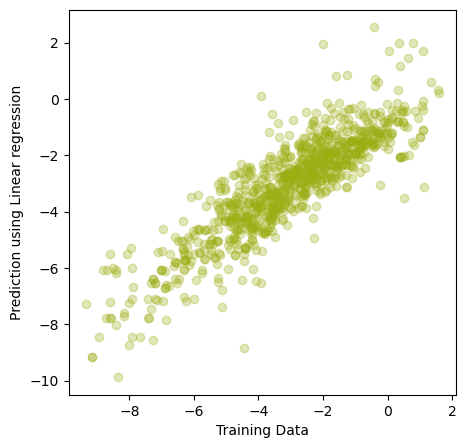

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred,c='#9CAE12',alpha=0.3)
plt.ylabel('Prediction using Linear regression')
plt.xlabel("Training Data")

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()
x_catagorical=